# Welcome to our Logistic Regression Workshop!

In our previous workshop, we discussed what linear regression is, and how it mathematically looks like. Now, we are going to start learning a more complicated regression algorithm, _logistic regression_. We will start by describing what logistic regression is, then give some mathematical intuition of how it works. Then, similar to previous week, we will implement our own logistic regression model and compare its performance to our linear regression model.


Let's start by understanding what _logistic regression_ is.

### Logistic Regression

- Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence. 
- It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.
- Remember the linear regression equation `Y = B + WX`? We will, in some sense, use this in a *normalized* way.
- We use a function called `sigmoid` (aka `logistic function`), which is of the form
$$
\text{p} = \frac{1}{1 + e^{-y}}
$$
- And we will apply sigmoid function on linear regression to obtain the formula
$$
\text{p} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + ... + \beta_n X_n)}}
$$
- Dependent variable `y` in logistic regression will follow `Bernoulli Distribution`
- We will do estimation through `Maximum Likelihood`

### What is the difference?
- Linear regression is suitable for `continuous output` cases, like stock or house prices based on several different parameters.
- Logistic regression is suitable for constant and discrete outputs, like whether a patient has cancer or not.

![graphs](https://images.datacamp.com/image/upload/v1660054820/Regression_charts_b9de7355cf.png)

- In our linear regression workshop, we used `Mean Squared Error (MSE)` to calculate the accuracy of our model, which is a `distance approximation` method. Now, we are going to use a `maximization method` called `Maximum Likelihood Estimation (MLE)` that will determine the parameters that are most likely to produce the observed data. Both are used to estimate the parameters of a regression model. MLE assumes a joint probability mass function, while `MSE` doesn't require any stochastic assumptions for minimizing distance.

### Sigmoid Function
- `Sigmoid` is a function that will give our graph an `S` shape, so that we can fit its center to the origin of our graph, and categorize our data points as `YES` or `NO`s.
- Sigmoid is of the form $$
\text{f(x)} = \frac{1}{1 + e^{-x}}
$$
- Sigmoid function can take any real value and converts it to a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. We generally say the output is `YES` if the result of sigmoid is greater than `0.5`, and `NO` if it is less than `0.5`.

- ![sigmoid](https://images.datacamp.com/image/upload/v1660054820/Line_graph_0672f6583d.png)


### In today's workshop, we will estimate the survival likelihood of the passengers of Titanic based on different parameters like age, sex, socio-economic status etc...
- This dataset is one of the most famous datasets to use for classification tasks, as it's well maintained, and easy to understand for beginners.
- We will first explore the dataset, and then implement our own logistic regression model from scratch, and see its performance on the dataset.

## Let's start by first exploring the dataset!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Load the dataset and clean it as needed

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

# See the column descriptions for dataset

titanic.info()

# Column descriptions
column_descriptions = {
    'PassengerId': 'A unique ID for each passenger',
    'Survived': 'Survival (0 = No, 1 = Yes)',
    'Pclass': 'Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)',
    'Name': 'Name of the passenger',
    'Sex': 'Sex of the passenger',
    'Age': 'Age of the passenger',
    'SibSp': 'Number of siblings/spouses aboard the Titanic',
    'Parch': 'Number of parents/children aboard the Titanic',
    'Ticket': 'Ticket number',
    'Fare': 'Fare paid by the passenger',
    'Cabin': 'Cabin number',
    'Embarked': 'Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)'
}

print("\nColumn Descriptions:")
for column, description in column_descriptions.items():
    print(f"{column}: {description}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Column Descriptions:
PassengerId: A unique ID for each passenger
Survived: Survival (0 = No, 1 = Yes)
Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: Name of the passenger
Sex: Sex of the passenger
Age: Age of the passenger
SibSp: Nu

Is our dataset complete? Let us see if there are any null or missing values.


Count of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


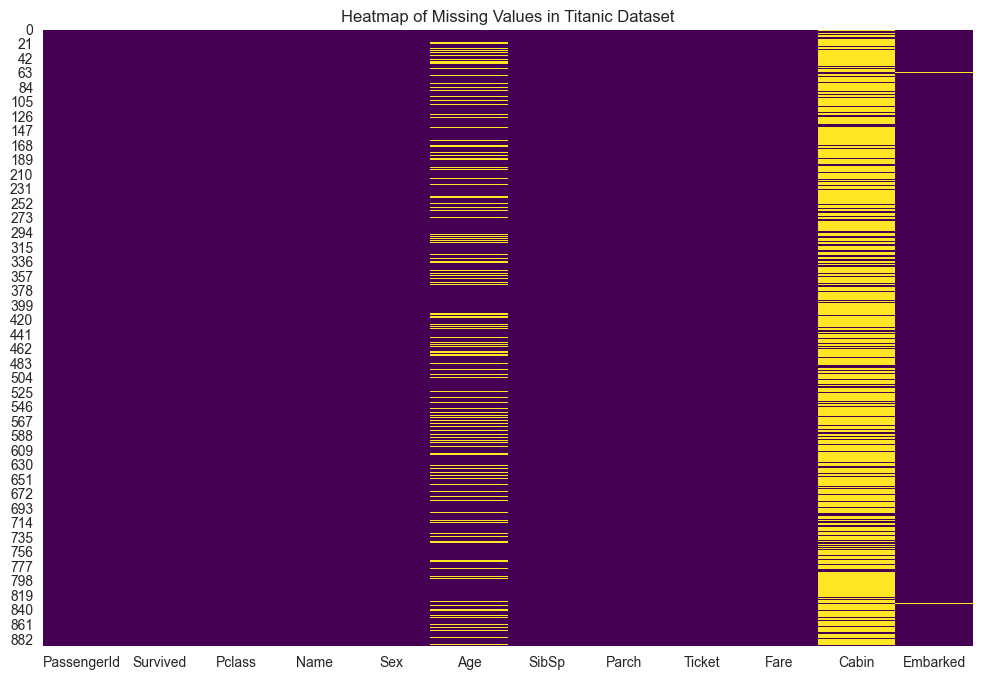

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values and display the count of missing values for each column
missing_values = titanic.isnull().sum()
print("\nCount of missing values in each column:")
print(missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Titanic Dataset')
plt.show()

# See the first few rows of the dataset
titanic.head()

Now let's clear the dataset by handling the missing values.

In [4]:
# Fill missing values for 'Age' with the median value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Fill missing values for 'Embarked' with the most frequent value
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Drop 'Cabin' if it exists, as it has many missing values
if 'Cabin' in titanic.columns:
    titanic = titanic.drop('Cabin', axis=1)

# Encode categorical variables
label_enc = LabelEncoder()
titanic['Sex'] = label_enc.fit_transform(titanic['Sex'].astype(str))
titanic['Embarked'] = label_enc.fit_transform(titanic['Embarked'].astype(str))

# Verify the encoding
unique_values = titanic['Sex'].unique()
print(f"Unique values in 'Sex' column: {unique_values}")

Unique values in 'Sex' column: [1 0]


Now let's see what the dataset looks like!

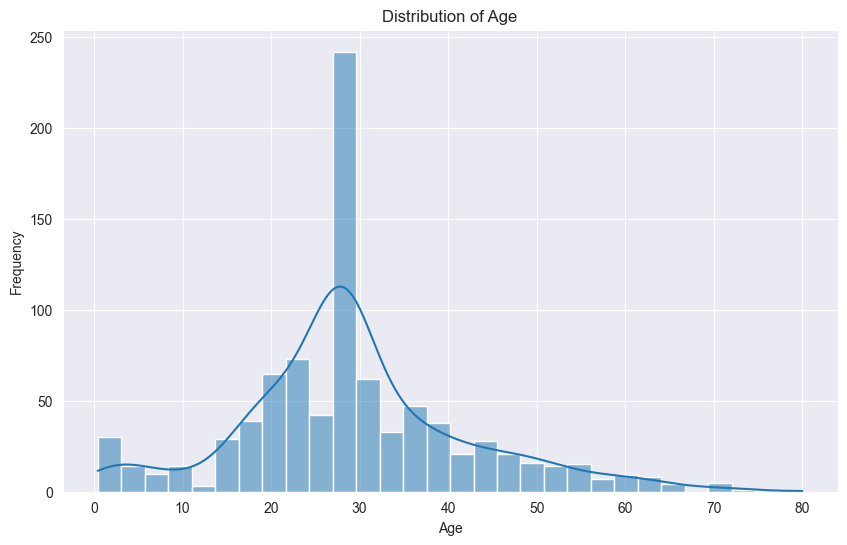

In [5]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

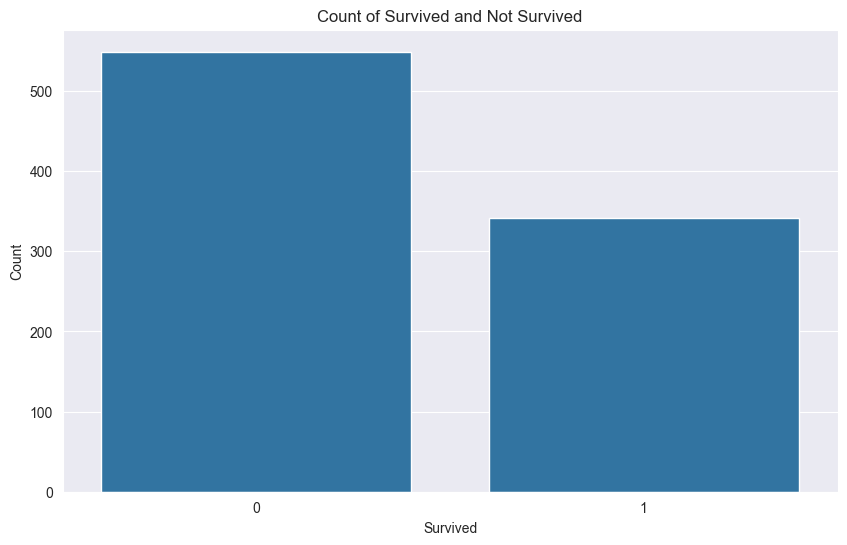

In [6]:
# Count of Survived and Not Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Count of Survived and Not Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

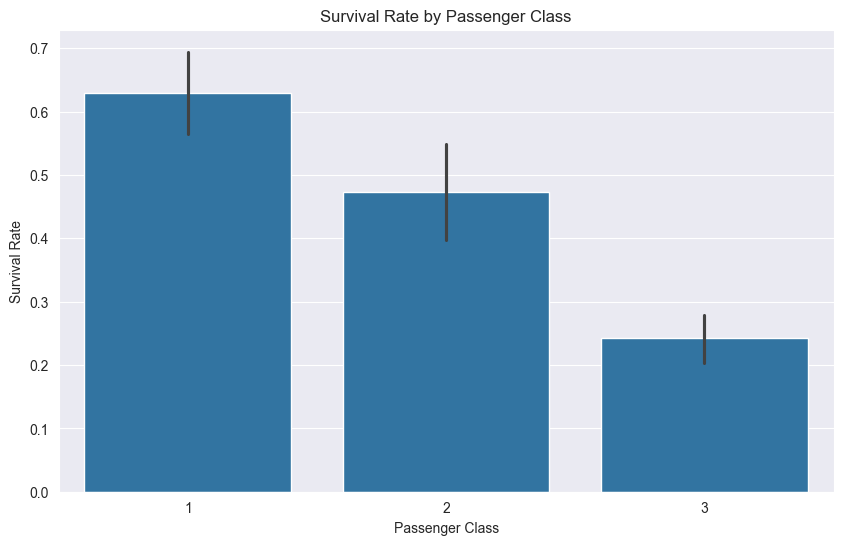

In [7]:
# Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

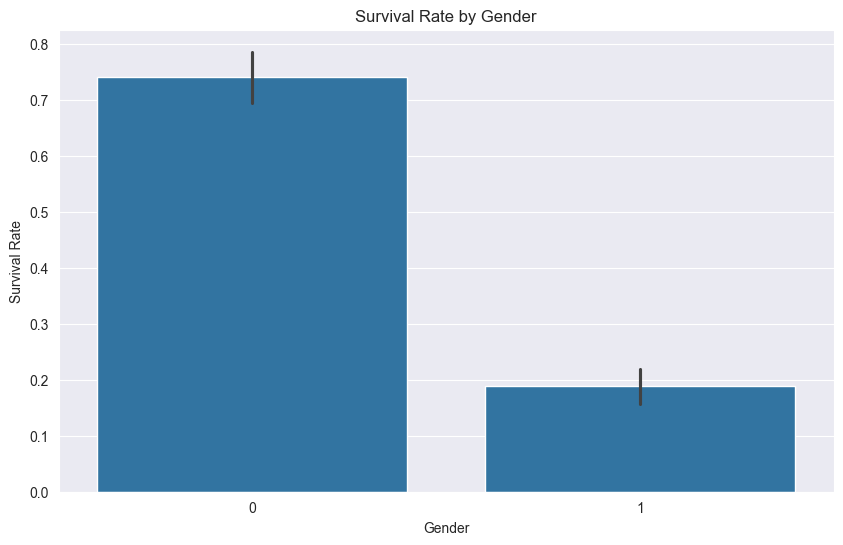

In [8]:
# Survival Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

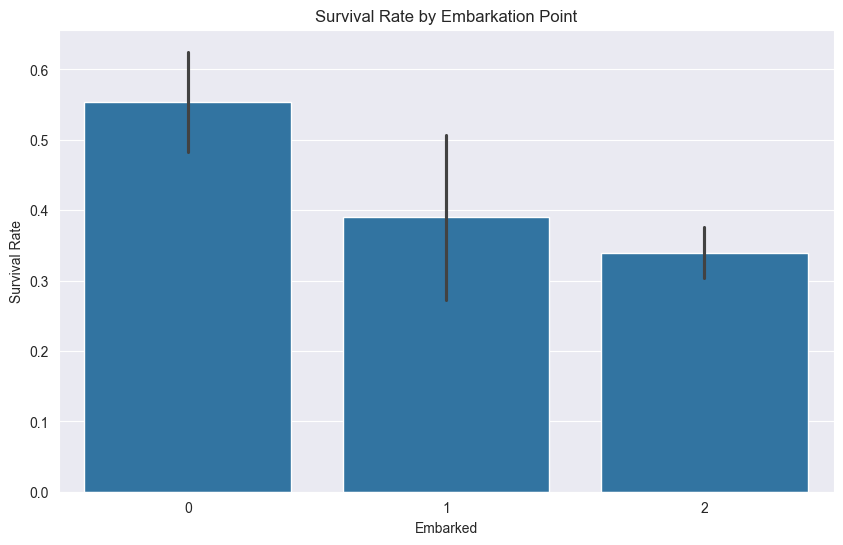

In [9]:
# Survival Rate by Embarkation Point
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

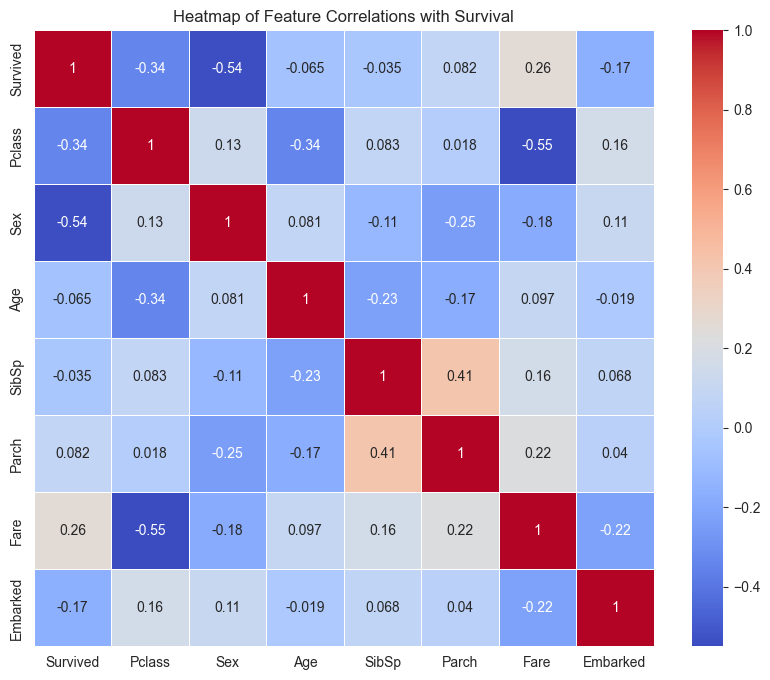

In [10]:
# Heatmap of Feature Correlations with Survival
plt.figure(figsize=(10, 8))
# Dropping non-numeric columns
numeric_titanic = titanic.drop(columns=['Name', 'Ticket', 'PassengerId'])
corr_matrix = numeric_titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations with Survival')
plt.show()

As we can see from the heatmap; gender and transportation class seems to be highly likely to be inversely related with death in our dataset. Now that we have related observations, let's prepare our dataset for training the model. We will do this by splitting our dataset into training and testing partitions.
- `X_train`: The independent variables we are going to use to train our model (basically any column except `survived`)
- `X_test`: The independent variables we are going to use to test our model's performance (our model will not be trained on this partition, otherwise it would be able to correctly predict the whole dataset, which is called `overfitting`)
- `y_train`: The dependent variable, whether the passenger has survived or not.
- `y_test`: The dependent test variable, used to check if our model guessed the test partition correctly.
- `random_state`: This value defines how the dataset is split into train and test partitions, it functions as a random seed for partitioning the dataset. We will use `42` as our random seed because why not, but you can use any number between 1 and 100 as you want.
- `scaler`: This object will help us fit the X values between a certain range by scaling parameters, so that we do not deal with extremely large or minimal values, as it can affect model's performance significantly.

In [11]:
# Select features and target variable
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Our dataset is ready to be fed into our logistic regression model, now it's time to implement the model itself! Here are a few things to note:
- `learning_rate`: The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Starting with 0.01 is a convention, but you are free to experiment with different values. Keeping this parameter small means model takes small, and thus more careful, steps towards the optimal solution. A larger learning rate can speed up training but risks overshooting the optimal solution.
- `epochs`: The number of epochs defines how many times the learning algorithm will work through the entire training dataset. More epochs can lead to better training as the model has more opportunities to learn from the data, but too many epochs can result in overfitting, where the model learns the noise in the training data rather than the actual patterns.
- `regularization`:  Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function. The type of regularization (e.g., L1, L2) can be specified. If None, no regularization is applied. Regularization techniques such as L1 (Lasso) or L2 (Ridge) add constraints to the model parameters, encouraging the model to keep them small to generalize better on unseen data.
- `alpha`: This is the regularization strength parameter. It controls the amount of regularization applied to the model. When alpha is set to 0.0, no regularization is applied. Increasing the value of alpha increases the penalty for large weights, which can help reduce overfitting by simplifying the model.

In [12]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, regularization=None, alpha=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization
        self.alpha = alpha
        self.coefficients = None
        self.intercept = None

    @staticmethod
    def _sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X_b.shape
        theta = np.random.randn(n, 1)

        for epoch in range(self.epochs):
            predictions = self._sigmoid(X_b.dot(theta))
            errors = predictions - y
            gradients = X_b.T.dot(errors) / m
            if self.regularization == "ridge":
                regularization_term = self.alpha * np.r_[np.zeros((1, 1)), theta[1:]]
                gradients += regularization_term / m
            theta -= self.learning_rate * gradients

        self.intercept = theta[0, 0]
        self.coefficients = theta[1:].flatten()

    def predict_proba(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return self._sigmoid(X_b.dot(np.r_[self.intercept, self.coefficients]))

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    @staticmethod
    def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)


Now let's train the model on our dataset:

In [13]:
model = LogisticRegression(learning_rate=0.01, epochs=10000, regularization="ridge", alpha=0.01)
model.fit(X_train, y_train)

In [14]:
predictions = model.predict(X_test)
proba_predictions = model.predict_proba(X_test)

In [15]:
accuracy = model.accuracy(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8100558659217877


Approximately 80%, not bad at all! Now let's analyze the performance even further.

In [16]:
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Understanding confusion matrix
- A confusion matrix is a performance measurement tool for classification problems in machine learning. It is a table that summarizes the performance of a classification model by showing the true and predicted classifications.
- For a binary classification problem, this matrix is in 2x2 shape, and rows/columns are labelled as follows:



- 

    |                     | **Predicted Positive** | **Predicted Negative** |
    |---------------------|------------------------|------------------------|
    | **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
    | **Actual Negative** | False Positive (FP)    | True Negative (TN)     |



- `True Positive (TP)`: The number of correct predictions that an instance is positive.
- `False Negative (FN)`: The number of incorrect predictions that an instance is negative.
- `False Positive (FP)`: The number of incorrect predictions that an instance is positive.
- `True Negative (TN)`: The number of correct predictions that an instance is negative.

- #### Metrics Derived from Confusion Matrix

- **Accuracy**: The proportion of the total number of predictions that were correct.
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$
  
- **Precision**: The proportion of positive predictions that were correct.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
  
- **Recall (Sensitivity or True Positive Rate)**: The proportion of actual positives that were correctly identified.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
  
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
  $$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
  

### Plotting the ROC Curve
- A Receiver Operating Characteristic (ROC) curve is a graphical representation used to assess the performance of a binary classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
- `True positive rate (TPR)`:

  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$

- `False positive rate (FPR)`:
  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

### Understanding the ROC curve

- X-axis (False Positive Rate): Represents the rate of false positives.
- Y-axis (True Positive Rate): Represents the rate of true positives.
- Diagonal Line (Random Classifier): The line y=xy=x represents a random classifier. A model with no discrimination capability between classes will lie along this line.

- Curve Analysis:
    - Closer to Top Left Corner: Indicates a better performing model with higher TPR and lower FPR.
    - Area Under the Curve (AUC): The AUC value ranges from 0 to 1, where 1 indicates a perfect model and 0.5 indicates a random classifier.

- Evaluating model performance based on area under curve `(AUC)`:
    - `AUC = 1`: Perfect classifier
    - `0.5 < AUC < 1`: Better than random guessing
    - `AUC = 0.5`: No discrimination capability, equivalent to random guessing
    - `AUC < 0.5`: Worse than random guessing

Now let's draw the ROC curve for our model.

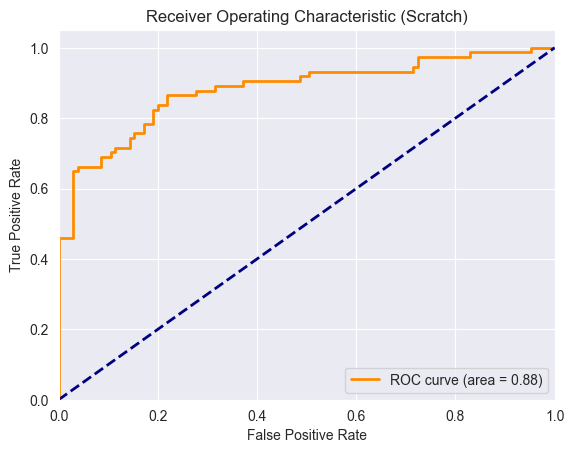

In [17]:
fpr, tpr, _ = roc_curve(y_test, proba_predictions)
roc_auc_scratch = roc_auc_score(y_test, proba_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_scratch:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Scratch)')
plt.legend(loc="lower right")
plt.show()

#### Our area is approximately `0.88`, indicating a pretty good performance on this dataset.

- We have successfully engineered our dataset by first handling the missing/outlying values, and used it to train our logistic regression model that we built from scratch.
- We observed its performance formally by using common metrics like F1 score, accuracy rate, and even drew the ROC curve to fully evaluate our model's performance.
- Further improvements on this task can be done by removing more features from dataset that does not seem to be related to dying in the crash, or experimenting with different epoch counts.

#### Now let's generate an arbitrary passenger to see if they survive or not.

Predicted survival probability: 0.5872901020853359
Predicted survival (0 = Not Survived, 1 = Survived): 1


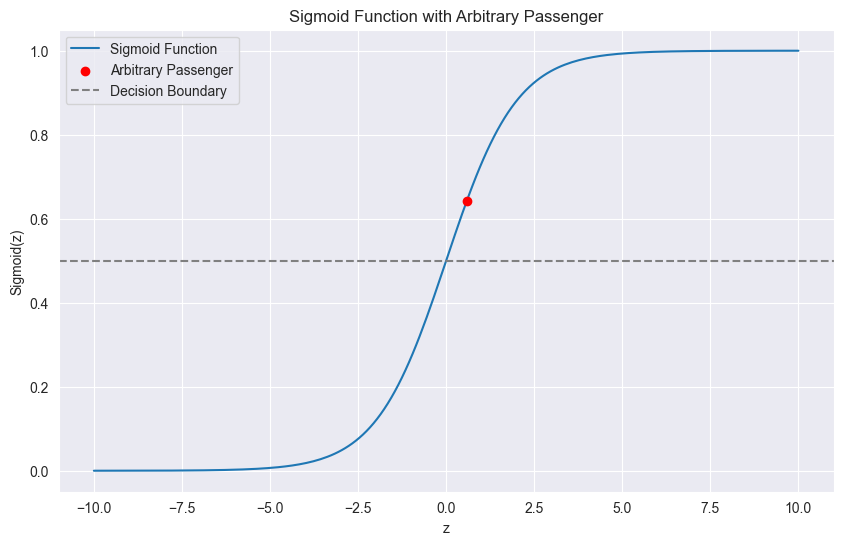

In [18]:
# Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# For example: 3rd class, male, 25 years old, 1 sibling/spouse, 0 parents/children, fare of $10, embarked from Southampton
arbitrary_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [10],
    'Embarked': [2]
})

# Scale the parameters for this arbitrary passenger, make sure to use the same scaler fitted on the training data
arbitrary_passenger_scaled = scaler.transform(arbitrary_passenger)

# Make a prediction
predicted_proba = model.predict_proba(arbitrary_passenger_scaled)
predicted_survival = model.predict(arbitrary_passenger_scaled)

print(f"Predicted survival probability: {predicted_proba[0]}")
print(f"Predicted survival (0 = Not Survived, 1 = Survived): {predicted_survival[0]}")

# See the passenger on the sigmoid graph

sigmoid_value = model.predict_proba(arbitrary_passenger_scaled)
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, label='Sigmoid Function')
plt.scatter([sigmoid_value], [1 / (1 + np.exp(-sigmoid_value))], color='red', zorder=5, label='Arbitrary Passenger')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary')
plt.title('Sigmoid Function with Arbitrary Passenger')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.legend()
plt.show()

As we can see, this passenger is just above the average survival probability, only by 8%.

## THANK YOU SO MUCH FOR ATTENDING!
#### This was the end of today's workshop. See you in the following weeks with more interesting and entertaining workshops about Machine Learning!